In [2]:
# Import Packages
import pickle
import numpy as np
import pandas as pd
import gensim
import os
import tempfile
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

The 3 cells are functions to convert downloaded HistWord files into Gensim file. No longer needed once Gensim files are created.

In [84]:
# Function for converting HistWords to Gensim

def w2v_to_gensim(vocab_file, vector_file, suffix = "gensim-en"):

    print("Converting:", vocab_file, vector_file, "...", end='')

    # loading vocabulary
    with open(vocab_file, 'rb') as handle:
        words = pickle.load(handle)

    # loading vector corresponding to the vocab
    w2v = np.load(vector_file)

    temp_filename = str.split(vocab_file, "/")[-1]
    temp_filename = str.split(temp_filename,".")[0]
    with tempfile.TemporaryDirectory() as tmpdirname:

        target_filename = tmpdirname + "\\temp.txt"
        model_filename = suffix + "/" + temp_filename + "-" + suffix + ".model"

        if not os.path.exists(suffix):
            os.makedirs(suffix)

        count = 0
        with open(target_filename, "w") as fp:
            for word, v in zip(words,w2v):
                if not any(v): continue
                try:
                    fp.write(word+ " " + " ".join(map(str, v)) + "\n")
                    count += 1
                except:
                    # print("error", word, v)
                    continue
            fp.close()


        with open(target_filename, "r+") as fp:
            content = fp.read()
            fp.seek(0, 0)
            temp = str(count) + " 300" + "\n" + content
            fp.write(temp)
            fp.close()
    
        model = gensim.models.KeyedVectors.load_word2vec_format(target_filename, unicode_errors='ignore')
        model.save(model_filename)
        print("\t-> Gensim Model:", model_filename, "DONE.")

In [ ]:
# Converts EN HistWords to Gensim. NOTE: Only run if gensim files hasn't been generated


vocab_list = ["source/en/" + str(a) + "-vocab.pkl" for a in np.arange(1800, 2000, 10)]
vec_list = ["source/en/" + str(a) + "-w.npy" for a in np.arange(1800, 2000, 10)]


for a, b in zip(vocab_list, vec_list):
    w2v_to_gensim(a, b)


In [85]:
# Converts FR HistWords to Gensim. NOTE: Only run if gensim files hasn't been generated


vocab_list = ["source/fr/" + str(a) + "-vocab.pkl" for a in np.arange(1800, 2000, 10)]
vec_list = ["source/fr/" + str(a) + "-w.npy" for a in np.arange(1800, 2000, 10)]


for a, b in zip(vocab_list, vec_list):
    w2v_to_gensim(a, b, suffix = "gensim-fr")


Converting: source/fr/1800-vocab.pkl source/fr/1800-w.npy ...	-> Gensim Model: gensim-fr/1800-vocab-gensim-fr.model DONE.
Converting: source/fr/1810-vocab.pkl source/fr/1810-w.npy ...	-> Gensim Model: gensim-fr/1810-vocab-gensim-fr.model DONE.
Converting: source/fr/1820-vocab.pkl source/fr/1820-w.npy ...	-> Gensim Model: gensim-fr/1820-vocab-gensim-fr.model DONE.
Converting: source/fr/1830-vocab.pkl source/fr/1830-w.npy ...	-> Gensim Model: gensim-fr/1830-vocab-gensim-fr.model DONE.
Converting: source/fr/1840-vocab.pkl source/fr/1840-w.npy ...	-> Gensim Model: gensim-fr/1840-vocab-gensim-fr.model DONE.
Converting: source/fr/1850-vocab.pkl source/fr/1850-w.npy ...	-> Gensim Model: gensim-fr/1850-vocab-gensim-fr.model DONE.
Converting: source/fr/1860-vocab.pkl source/fr/1860-w.npy ...	-> Gensim Model: gensim-fr/1860-vocab-gensim-fr.model DONE.
Converting: source/fr/1870-vocab.pkl source/fr/1870-w.npy ...	-> Gensim Model: gensim-fr/1870-vocab-gensim-fr.model DONE.
Converting: source/fr/18

In [4]:
# Retrieve file names in the "gensim-en" directory. The list will be used repeatedly to extract word vectors.

sub_dir = os.getcwd() + "\\" + "gensim-en"

gensim_file_path = []
for filename in os.listdir(sub_dir):
   with open(os.path.join(sub_dir, filename), 'r') as f:
      if "vectors.npy" in f.name: continue
      gensim_file_path.append(f.name)
      # print(f.name)

Below are 3 cells of lists consists of (1) Occupation and Profession Nouns, (2) Positive and Negative Adjectives, (3) Apperance Adjectives. Curated from various internet sources.

In [7]:
# List: (1) occu_nouns_with_plurality (2) occu_nouns_with_plurality (3) profession_nouns (4) services_nouns
# https://www2.census.gov/library/publications/decennial/1900/occupations/occupations-part-7.pdf
occu_nouns_with_plurality = [
["draymen"],
["foremen"],
["hostler"],
["hucksters"],
["merchant"],
["messenger"],
["packer"],
["porter"],
["telegrapher"],
["manufacturer"],
["carpenter"],
["painter"],
["plumber"],
["brickmaker"],
["potter"],
["fishermen"],
["miner"],
["baker"],
["butcher"],
["miller"],
["blacksmith"],
["ironworker"],
["machinist"],
["shoemaker"],
["carrier"],
["cooper"],
["woodworker"],
["tinners"],
["printer"],
["dressmaker"],
["milliner"],
["seamstresses"],
["tailor"],
["tailoress"],
["engineer"],
["fireman"],
["drayman"],
["foreman"],
["hostlers"],
["peddlers"],
["dealer"],
["messengers"],
["shipper"],
["helper"],
["telegraphers"],
["manufacturers"],
["joiner"],
["glazier"],
["plumbers"],
["brickmakers"],
["potters"],
["fisherman"],
["miners"],
["bakers"],
["butchers"],
["millers"],
["blacksmiths"],
["steelworker"],
["machinests"],
["shoemakers"],
["tanner"],
["coopers"],
["woodworkers"],
["tinsmith"],
["lithographer"],
["dressmakers"],
["milliners"],
["seamstress"],
["tailors"],
["tailoresses"],
["engineers"],
["firemen"],
["hackmen"],
["hackman"],
["teamster"],
["teamsters"],
["overseer"],
["overseers"],
["huckster"],
["peddler"],
["merchants"],
["dealers"],
["packers"],
["shippers"],
["porters"],
["helpers"],
["carpenters"],
["joiners"],
["varnisher"],
["painters"],
["glaziers"],
["varnishers"],
["tilemaker"],
["tilemakers"],
["ironworkers"],
["steelworkers"],
["carriers"],
["tanners"],
["pressman"],
["printers"],
["lithographers"],
["pressmen"],

]

# List of occupational nouns without pluarity
occu_nouns_singular = [
    ["hackman"],
    ["teamster"],
    ["foreman"],
    ["overseer"],
    ["hostler"],
    ["huckster"],
    ["peddler"],
    ["merchant"],
    ["dealer"],
    ["messenger"],
    ["packer"],
    ["shipper"],
    ["helper"],
    ["porter"],
    ["manufacturer"],
    ["carpenter"],
    ["joiner"],
    ["painter"],
    ["glazier"],
    ["varnisher"],
    ["plumber"],
    ["tilemaker"],
    ["potter"],
    ["fisherman"],
    ["miner"],
    ["baker"],
    ["butcher"],
    ["miller"],
    ["blacksmith"],
    ["ironworker"],
    ["steelworker"],
    ["machinist"],
    ["shoemaker"],
    ["carrier"],
    ["tanner"],
    ["cooper"],
    ["woodworker"],
    ["tinsmith"],
    ["printer"],
    ["lithographer"],
    ["pressman"],
    ["dressmaker"],
    ["milliner"],
    ["engineer"],
    ["fireman"],
    ["driver"],
# ]

# profession_nouns = [
    ["achitect"],
    ["artist"],
    ["sculptor"],
    ["dentist"],
    ["electrician"],
    ["editor"],
    ["reporter"],
    ["judge"],
    ["lawyer"],
    ["astronomer"],
    ["author"],
    ["chemist"],
    ["explorer"],
    ["geologist"],
    ["librarian"],
    ["translator"],
    ["musician"],
    ["inspector"],
    ["officer"],
    ["physician"],
    ["surgeon"],
    ["professor"],
    ["teacher"],
    ["veterinarian"],
# ]

# services_nouns = [
    ["bartender"],
    ["hotelkeeper"],
    ["innkeeper"],
    ["housekeeper"],
    ["janitor"],
    ["laborer"],
    ["servant"],
    ["doctor"],
    ["nurse"],
    ["marine"],
    ["soldier"],
]

In [5]:
# Appearance Adjectives
# source: https://englishgrammarhere.com/adjectives/appearance-adjectives-list-in-english/
appearance_adj = [
    ["Adorable"],
    # ["Adult"],
    ["Adventurous"],
    ["Aggressive"],
    ["Alert"],
    ["Athletic"],
    ["Attractive"],
    ["Average"],
    ["Beautiful"],
    ["Big"],
    ["Bloody"],
    ["Blue-eyed"],
    ["Blushing"],
    ["Bright"],
    ["Chubby"],
    ["Clean"],
    ["Clear"],
    ["Cloudy"],
    # ["Colorful"],
    ["Crowded"],
    ["Curvy"],
    ["Cute"],
    ["Dark"],
    ["Distinct"],
    ["Dirty"],
    ["Drab"],
    ["Dull"],
    ["Elderly"],
    ["Elegant"],
    ["Excited"],
    ["Fancy"],
    ["Fashionable"],
    ["Fat"],
    ["Feeble"],
    ["Filthy"],
    ["Fit"],
    ["Glamorous"],
    ["Gleaming"],
    ["Good-looking"],
    ["Gorgeous"],
    ["Graceful"],
    ["Grotesque"],
    ["Handsome"],
    ["Heavy"],
    ["Homely"],
    # ["Hot"],
    ["Husky"],
    ["Lanky"],
    ["Large"],
    ["Lean"],
    # ["Light"],
    ["Long"],
    ["Lovely"],
    ["Magnificent"],
    ["Middle-aged"],
    ["Misty"],
    # ["Motionless"],
    ["Muddy"],
    ["Muscular"],
    ["Neat"],
    ["Old"],
    ["Old-Fashioned"],
    ["Overweight"],
    ["Obese"],
    ["Petite"],
    # ["Plain"],
    ["Plump"],
    ["Poised"],
    ["Poorly-dressed"],
    ["Precious"],
    ["Pretty"],
    ["Ripped "],
    ["Quaint"],
    ["Shiny"],
    ["Skinny"],
    ["Slender"],
    ["Slim"],
    ["Smoggy"],
    ["Sparkling"],
    # ["Spotless"],
    ["Stormy"],
    ["Strange"],
    ["Stromy"],
    ["Strong"],
    ["Stunning"],
    ["Thin"],
    ["Tidy"],
    # ["Ugliest"],
    ["Ugly"],
    ["Unattractive"],
    ["Unsightly"],
    ["Untidy"],
    # ["Unusual"],
    ["Weak"],
    ["Well-dressed"],
    ["Wide-Eyed"],
    ["Wiry"],
    ["Young"],
    ["Great"],
]

In [6]:
# Positive and Negative Adjectives
# source: https://grammar.yourdictionary.com/parts-of-speech/adjectives/personal-adjective.html

personality_adj = [
    ["adventurous"],
    ["affable"],
    ["assertive"],
    ["active"],
    ["cheerful"],
    ["considerate"],
    ["convivial"],
    ["diplomatic"],
    ["empathetic"],
    ["encouraging"],
    ["enthusiastic"],
    ["gregarious"],
    ["hopeful"],
    ["laid-back"],
    ["motivated"],
    ["optimistic"],
    ["resourceful"],
    ["sincere"],
    ["supportive"],
    ["trustworthy"],
    ["argumentative"],
    ["childish"],
    ["cynical"],
    ["disruptive"],
    ["hostile"],
    ["inconsiderate"],
    ["lazy"],
    ["moody"],
    ["one-sided"],
    ["patronizing"],
    ["pessimistic"],
    ["resentful"],
    ["selfish"],
    ["unreliable"],
    ["weak"],
    ["hysterical"],

]

The next two cells build and compose the gender vector. The gender vector is different for each decade therefore must be calculated individually.

In [24]:
# List: gender_pair words e.g. wife/husband; her/him; queen/king. Fn: find_gender_vector() for finding gender vector
# https://link.springer.com/content/pdf/10.1007/978-3-319-59888-8.pdf pg. 361
# Exploring the Role of Gender in 19th Century Fiction
gender_pairs = [
  ("wife","husband"),
  ("her","him"),
  ("herself","himself"),
  ("mother","father"),
  ("queen", "king"),
  # ("she", "he"),
  # ("sister","brother"),
  # ("daughter","son"),
  # ("aunt","uncle"),
  # ("lady","gentleman"),
  # ("girl","boy"),
]

def find_gender_vector(pairs, gensim_model):
  gender_vectors = [
    gensim_model.get_vector(pair[0]) - gensim_model.get_vector(pair[1])
    for pair in pairs
    ]

  return np.mean(gender_vectors, axis=0)

In [25]:
# Building Gender Vector for every decade

temp_vector = []

print("Building ", end='')
for file_path in gensim_file_path:    
    print('.', end='')
    model = gensim.models.KeyedVectors.load(file_path)
    # model = gensim.models.KeyedVectors.load_word2vec_format(file_path, unicode_errors='ignore')
    temp_vector.append(find_gender_vector(gender_pairs, model))
    

Building ....................

## Part 1: Occupation and Profession Nouns

The next cell is a function to calculate how often a word shows up in each decade's word embedding model. The goal is to find minimum consecutive appearance, and we want to omit words that appears sparsely.

In [26]:
# Finding available words in each decade


def filter_minimum_years(word_list, file_path_list, min_years = 5):
    # Function for finding which year's corpora has a specific word
    # Because we are trying to observe diacronic change, it is important for the word to appear in a minimum number of consecutive years.

    def find_year_range(year_list):
        year_list_min = [int(year/10) for year in year_list]
        year_range_list = []
        year_range_count = []
        start = -1
        counter = 0
        last_year = -1
        for year in year_list_min:        
            if start == -1:
                start = year
            if year - start == counter:
                # print("go next")
                counter += 1
                last_year = year
            else:
                if start == last_year:
                    year_range_list.append([start*10])
                    # year_range_list.append((str(start*10)))
                else:
                    year_range_list.append([start*10, last_year*10])
                    # year_range_list.append((str(start*10) + "-" + str(last_year*10)))
                year_range_count.append(counter)
                start = year
                counter = 1
        
        # store record for the last time
        year_range_list.append([start*10, last_year*10])
        # year_range_list.append((str(start*10) + "-" + str(last_year*10)))
        year_range_count.append(counter)
        # print(year_range_list)
        # print(year_range_count)
        return([year_range_list, year_range_count])

    temp = []

    print("Input word count:", len(word_list))
    word_in_range = {}

    for file_path in file_path_list:
        file_name = file_path.split("\\")[-1]
        this_file_year = int(file_name.split("-")[0])
        # print('.', end='')
        model = gensim.models.KeyedVectors.load(file_path)
        test = [b.lower() for a in (word_list) for b in a if b.lower() in model]
        for t in test:
            if t not in word_in_range:
                word_in_range[t] = []
            word_in_range[t].append(this_file_year)
        # print("- No. of compiled words in \"" + file_name + "\":", len(test))

        # break


    for k in word_in_range.keys():
        # print(k, "\t", *word_in_range[k], sep = ", ")
        res = find_year_range(word_in_range[k])    

        if max(res[1]) > min_years:
            temp.append(k)
        # print("\t\t",find_year_range(word_in_range[k]))
    print("Filtered word count:", len(temp))
    return temp

# Gather the list of words from previous lists.
compiled_test_words = occu_nouns_singular + occu_nouns_with_plurality
MINIMUM_CONSECUTIVE_YEARS = 6    
compiled_test_words_min_years = filter_minimum_years(compiled_test_words, gensim_file_path, MINIMUM_CONSECUTIVE_YEARS)



Input word count: 183
Filtered word count: 58


The next cell is a function responsible for parsing through the list of curated words and returning a list of scores

In [27]:
# Calculating score

# flatten words to single list
# compiled_test_words =  [a for s in occu_nouns_singular for a in s]

def get_score_from_list(word_list, file_path_list):

    # function for calculating the score
    def score_2(w, gender_vector, m):
        test_word_projection = np.dot(m.get_vector(w), gender_vector)

        mean_female_projection = np.mean([np.dot(m.get_vector(word[0]), gender_vector) for word in gender_pairs])
        mean_male_projection = np.mean([np.dot(m.get_vector(word[1]), gender_vector) for word in gender_pairs])

        mean_projection = (mean_male_projection + mean_female_projection) / 2

        test_word_score = 2 * (test_word_projection - mean_projection) / (mean_female_projection - mean_male_projection)

        return test_word_score

    temp = []
    for file_path, gen_vec_index in zip(file_path_list, range(len(temp_vector))):
        file_name = file_path.split("\\")[-1]
        this_file_year = int(file_name.split("-")[0])
        model = gensim.models.KeyedVectors.load(file_path)
        for t in word_list:
            if t not in model: continue
            temp.append([t, this_file_year, score_2(t, temp_vector[gen_vec_index] , model)])
    return temp

word_vectors_list = get_score_from_list(compiled_test_words_min_years, gensim_file_path)
word_vectors_list = pd.DataFrame(word_vectors_list, columns=['word','year','score'])


The next cell is a function responsible for printing the mean score and slop, and plotting the time-series graph.

             slope  mean_score
packers   0.006441   -0.083543
explorer  0.005203   -0.365921
foremen   0.004037   -0.257856
shippers  0.003831   -0.217802
janitor   0.003559   -0.078649
helpers   0.003171   -0.361351
bakers    0.002946   -0.076784
printers  0.002900   -0.137552
miners    0.002742   -0.190000
teacher   0.002440   -0.434200


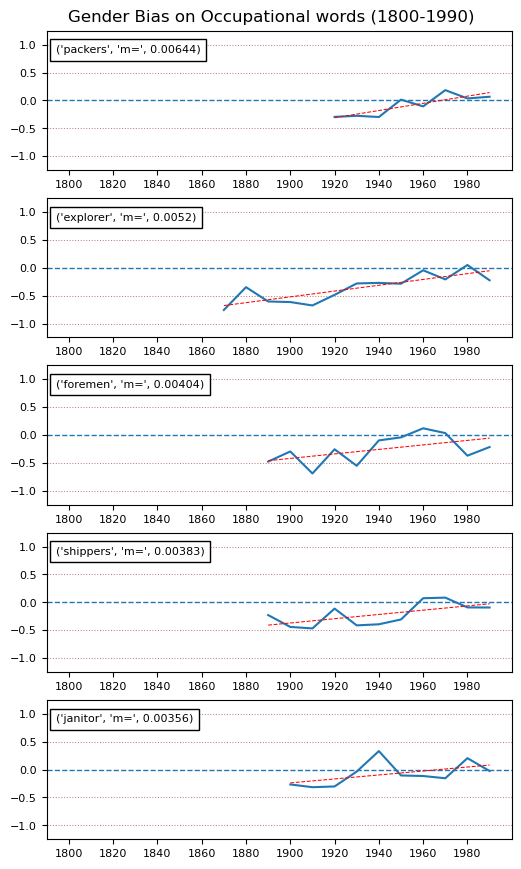

In [28]:
# Plotting Graph

def plot_graph(lines, slope_threshold=0.001, head_count=5, title="Graph"):

    # filter out likely candidates
    curated_lines = []
    report = []
    for word in lines:
        x = word_vectors_list[word_vectors_list.word == word].year
        y = word_vectors_list[word_vectors_list.word == word].score

        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        report.append([word, p[1]])
        if abs(p[1]) > slope_threshold:
            curated_lines.append(word)
    

    # Override curated_lines using the top 10 slopes instead.
    curated_lines = pd.DataFrame(report).sort_values(1, key=abs, ascending=False).head(head_count).iloc[:,0].to_list()

    # word_vectors_list.plot(subplots=True, legend=False, y='score', x='year')
    px = 1/plt.rcParams['figure.dpi']
    fig, axs = plt.subplots(len(curated_lines), sharey=True, figsize=(600*px, (50+200*head_count)*px))
    fig.subplots_adjust(hspace=0.2)

    fig.suptitle(title, y=.9)
    for word, c in zip(curated_lines, range(len(curated_lines))):
        x = word_vectors_list[word_vectors_list.word == word].year
        y = word_vectors_list[word_vectors_list.word == word].score

        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)    
        
        axs[c].set_xticks(np.arange(1800, 2000, 20))    
        axs[c].set_xticklabels((np.arange(1800, 2000, 20)))
        axs[c].tick_params(axis='both', which='major', labelsize=8)
        axs[c].set_title((word,"m=",round(p[1],5)), fontsize='8', loc='left', y=0.98, x=0.02, pad=-14, bbox=dict(facecolor='white', alpha=1))
        axs[c].set_ylim([-1.25, 1.25])
        axs[c].set_xlim([1790, 2000])
        axs[c].axhline(0, linestyle='--', linewidth=1,)
        [axs[c].axhline(a, xmin=0, xmax=1, linewidth=0.75, linestyle=':', color =(0.5, 0, 0, 0.5)) for a in [1, 0.5, -0.5, -1]]
        axs[c].plot(x, y)

        
        axs[c].plot(x, p(x), color='red', linewidth=0.75, linestyle="--")

    return(report)


SLOPE_THRESHOLD = 0.001
lines = word_vectors_list.word.unique()
report_slope = plot_graph(lines, SLOPE_THRESHOLD, head_count=5, 
            title="Gender Bias on Occupational words (1800-1990)")

temp_pd = pd.DataFrame(report_slope).set_index(0)
temp_pd.index.name = None
temp_pd = temp_pd.join(pd.DataFrame(word_vectors_list.groupby('word', as_index=True)['score'].mean()))
temp_pd.columns = ['slope','mean_score']
print(temp_pd.iloc[temp_pd.slope.abs().argsort()[::-1]].head(10))


## Part 2: Positive and Negative Adjectives

Part 1 helped defined all the functions. From here onwards we only need to call the relevant functions to get the results.

Input word count: 36
Filtered word count: 12
                 slope  mean_score
childish      0.001544    0.118886
active        0.001244   -0.342752
weak          0.001145   -0.166550
enthusiastic  0.001002   -0.338284
sincere       0.000998   -0.412859
cheerful      0.000988   -0.045119
lazy         -0.000905   -0.193117
affable       0.000636   -0.234352
adventurous   0.000630   -0.411015
selfish      -0.000493   -0.340695


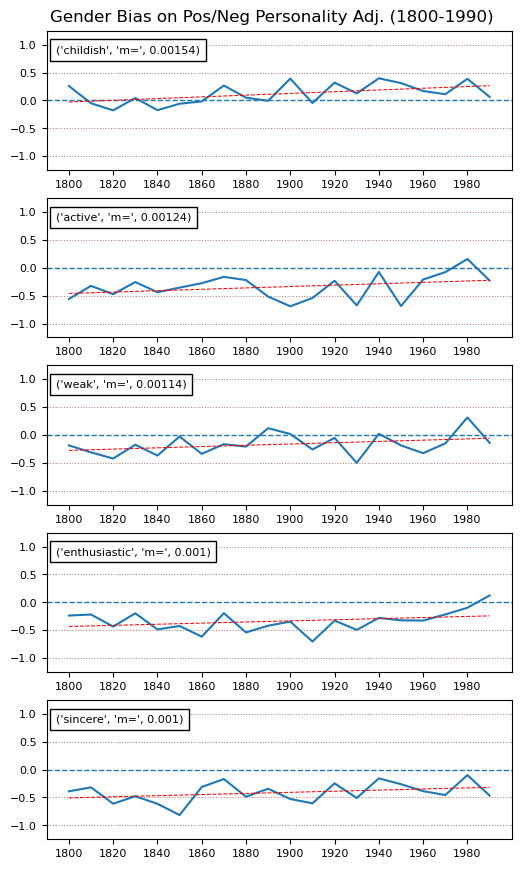

In [13]:
compiled_test_words = personality_adj
# MINIMUM_CONSECUTIVE_YEARS = 19
compiled_test_words_min_years = filter_minimum_years(compiled_test_words, gensim_file_path, MINIMUM_CONSECUTIVE_YEARS)
word_vectors_list = get_score_from_list(compiled_test_words_min_years, gensim_file_path)
word_vectors_list = pd.DataFrame(word_vectors_list, columns=['word','year','score'])
SLOPE_THRESHOLD = 0.001
lines = word_vectors_list.word.unique()
report_adj_slope = plot_graph(lines, SLOPE_THRESHOLD, head_count=5,
    title="Gender Bias on Pos/Neg Personality Adj. (1800-1990)")
    
temp_pd = pd.DataFrame(report_adj_slope).set_index(0)
temp_pd.index.name = None
temp_pd = temp_pd.join(pd.DataFrame(word_vectors_list.groupby('word', as_index=True)['score'].mean()))
temp_pd.columns = ['slope','mean_score']
print(temp_pd.iloc[temp_pd.slope.abs().argsort()[::-1]].head(10))

## Part 3: Appearance Adjectives

Input word count: 90
Filtered word count: 67
               slope  mean_score
cute        0.006152   -0.006210
muscular    0.004024    0.081173
gleaming    0.003363    0.221895
elegant     0.003073    0.050862
slender     0.002881    0.320330
aggressive  0.002797   -0.353645
alert       0.002757   -0.229706
precious    0.002745   -0.061185
bright      0.002715    0.196738
drab        0.002702    0.121159


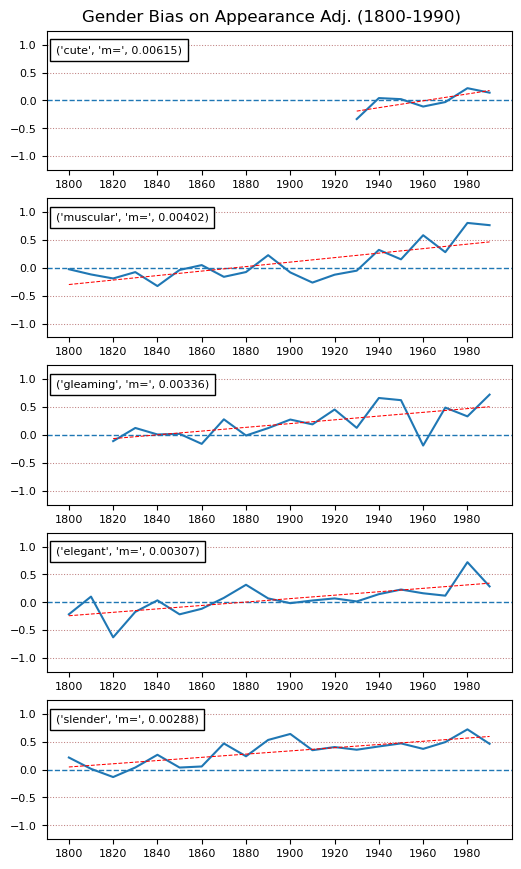

In [14]:
# appearance_adj
compiled_test_words = appearance_adj
MINIMUM_CONSECUTIVE_YEARS = 6
compiled_test_words_min_years = filter_minimum_years(compiled_test_words, gensim_file_path, MINIMUM_CONSECUTIVE_YEARS)
word_vectors_list = get_score_from_list(compiled_test_words_min_years, gensim_file_path)
word_vectors_list = pd.DataFrame(word_vectors_list, columns=['word','year','score'])
SLOPE_THRESHOLD = 0.001
lines = word_vectors_list.word.unique()
report_appear_adj_slope = plot_graph(lines, SLOPE_THRESHOLD, head_count=5,
    title="Gender Bias on Appearance Adj. (1800-1990)")

temp_pd = pd.DataFrame(report_appear_adj_slope).set_index(0)
temp_pd.index.name = None
temp_pd = temp_pd.join(pd.DataFrame(word_vectors_list.groupby('word', as_index=True)['score'].mean()))
temp_pd.columns = ['slope','mean_score']
print(temp_pd.iloc[temp_pd.slope.abs().argsort()[::-1]].head(10))

## Part 4: Validation

To ensure that the gender scoring function is producing scores as expected, it was suggested to us that we can use gendered words to see whether they produce expected scores.

Input word count: 1
Filtered word count: 10
                slope  mean_score
grandmother  0.002168    0.699687
grandfather -0.000205   -0.382672
god          0.001139   -1.116698
goddess      0.001297    0.270712
master       0.000169   -0.752559
mistress    -0.001725    0.472195
nephew       0.001278   -0.477767
niece       -0.000361    0.477013
duke         0.001719   -0.467479
duchess      0.001965    0.614398


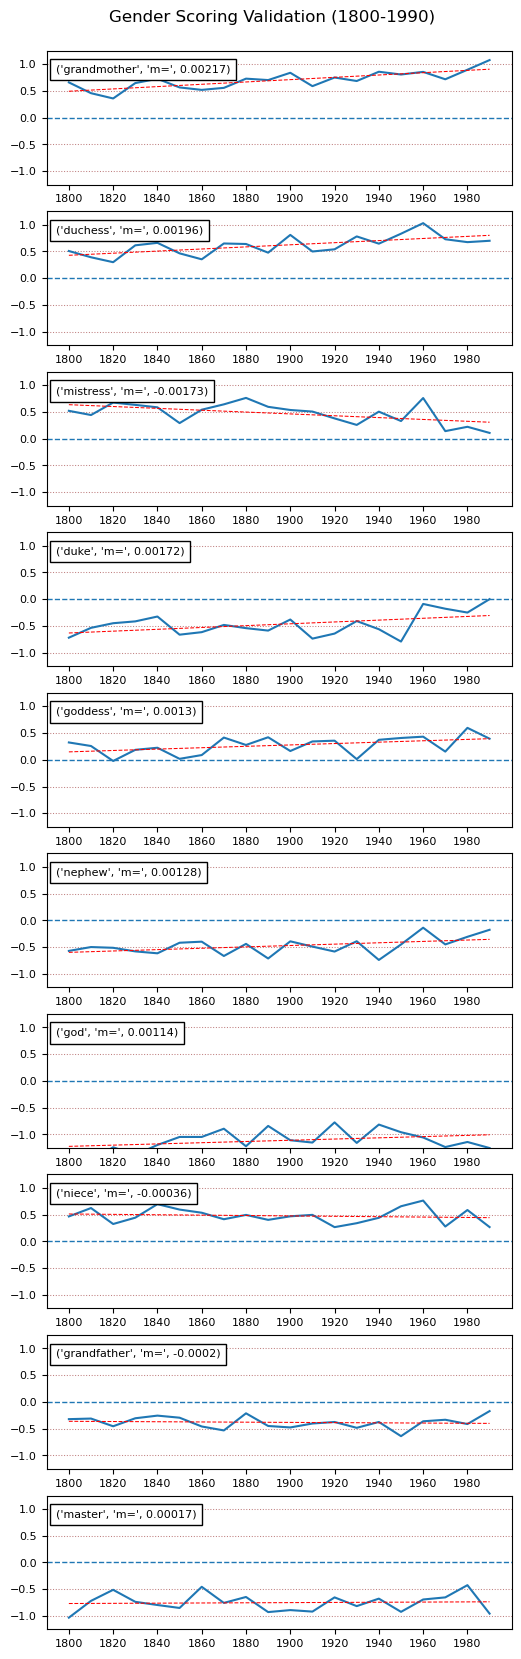

In [15]:
# list source from https://www.myenglishpages.com/english/grammar-lesson-masculine-feminine.php

compiled_test_words = [["grandmother","grandfather","god","goddess","master","mistress",
        "nephew","niece","duke","duchess"]]
# MINIMUM_CONSECUTIVE_YEARS = 14    
compiled_test_words_min_years = filter_minimum_years(compiled_test_words, gensim_file_path, 0)
word_vectors_list = get_score_from_list(compiled_test_words_min_years, gensim_file_path)
word_vectors_list = pd.DataFrame(word_vectors_list, columns=['word','year','score'])
SLOPE_THRESHOLD = 0
lines = word_vectors_list.word.unique()
report_validation_slope = plot_graph(lines, SLOPE_THRESHOLD, head_count=10,
    title="Gender Scoring Validation (1800-1990)")

temp_pd = pd.DataFrame(report_validation_slope).set_index(0)
temp_pd.index.name = None
temp_pd = temp_pd.join(pd.DataFrame(word_vectors_list.groupby('word', as_index=True)['score'].mean()))
temp_pd.columns = ['slope','mean_score']
print(temp_pd)

# French

In [16]:
# Retrieve file names in the "gensim-en" directory

sub_dir_fr = os.getcwd() + "\\" + "gensim-fr"

gensim_file_path_fr = []
for filename in os.listdir(sub_dir_fr):
   with open(os.path.join(sub_dir_fr, filename), 'r') as f:
      if "vectors.npy" in f.name: continue
      gensim_file_path_fr.append(f.name)
      # print(f.name)

Below defineds the gender vector for French. We've made many attempts to find suitable gender-paired words for the gender vector, but there were too many French translations returned, and we were unable to figure out which we should use.

In [46]:
# Gender Pairs and building gender vector for French
gender_pairs = [
  ("reine", "roi"),
  ("femme","homme"),
  ("femmes","hommes"),
]

temp_vector = []

print("Building ", end='')
for file_path in gensim_file_path_fr:    
    print('.', end='')
    model = gensim.models.KeyedVectors.load(file_path)
    # model = gensim.models.KeyedVectors.load_word2vec_format(file_path, unicode_errors='ignore')
    temp_vector.append(find_gender_vector(gender_pairs, model))

Building ....................

Below are attempts to further the study using top gender-bias words extracted from English. Unfortunately, most of the translated words did not exist in the French word embedding. Hence we had to abandon our initial plans and figure something else.

In [47]:
# list of translations
'''
salesmen = vendeurs
packers
explorer
foremen
shippers


resourceful
pessimistic
argumentative
inconsiderate
hysterical


muscular
gleaming
light
elegant
slender
'''

french_list_occ_female = [
    ['emballeuses'], # packers
    ['exploratrice'], # explorer
    ['expéditrices'], # shippers
]

french_list_occ_male = [
    ['emballeurs'], # packers
    ['explorateur'], # explorer
    ['expéditeurs'], # shippers
]

french_list_personality_female = [
    ['ingénieuse'], # resourceful
    ['argumentative'], # argumentative
    ['inconsidérée'], # inconsiderate
]

french_list_personality_male = [
    ['ingénieux'], # resourceful
    ['argumentative'], # argumentative
    ['inconsidérée'], # inconsiderate
]

french_list_appearance_adj_female = [
    ['musclée'], # musclé
    ['luisante'], # gleaming
    ['élégante'], # elegant
]

french_list_appearance_adj_male = [
    ['musclé'], # musclé
    ['luisant'], # gleaming
    ['élégant'], # elegant
]

Below we curate a list of occupation and profession nouns in French, just like what we have done for English. At the bottom of the cell lies a short function to quickly test how many words pass the minimum consectuive decades threshold.

In [1]:
# list of Occupation and Profession nouns in French
# https://learntofrench.com/les-metiers-jobs-in-french/
# https://www.lawlessfrench.com/vocabulary/professions/

quick_list = [
    ['actrice'],
    ['architecte'],
    ['compositeur'],
    ["acteur"],
    ["artiste"],
    ["boulanger"],
    ["boucher"],
    ["charpentier"],
    ["caissier"],
    ["dentiste"],
    ["médecin"],
    ["électricien"],
    ["employé"],
    ["ingénieur"],
    ["pompier"],
    ["avocat"],
    ["gérant"],
    ["mécanicien"],
    ["infirmier"],
    ["peintre"],
    ["pharmacien"],
    ["plombier"],
    ["policier"],
    ["réceptionniste"],
    ["secrétaire"],
    ["étudiant"],
    ["enseignant"],
    ["serveur"],
    ["écrivain"],
    ["boulangère"],
    ["caissière"],
    ["fonctionnaire"],
    ["dentiste"],
    ["médecin"],
    ["électricienne"],
    ["employée"],
    ["ingénieure"],
    ["avocate"],
    ["gérante"],
    ["mécanicienne"],
    ["infirmière"],
    ["pharmacienne"],
    ["réceptionniste"],
    ["scientifique"],
    ["secrétaire"],
    ["étudiante"],
    ["professeur"],
    ["professeure"],
    ["prof"],
    ["enseignante"],
    ["serveuse"],
    ["écrivaine"],
    ["chef"],
    ["cuisinier"],
    ["manager"],
    ["gérante"],
    ["maire"],
    ["gouverneur"],
    ["employeur"],
    ["assureur"],
    ["auteur"],
    ["écrivain"],
    ["ingénieur"],
    ["pompier"],
    ["sage-femme"],
]

# c = [b.lower() for a in (quick_list) for b in a]
# for d in c:
#     print(d+": ", end = "")
#     for file_path in gensim_file_path_fr:
#         model = gensim.models.KeyedVectors.load(file_path)    
#         if d in model:        
#             print("O", end="")
#         else:
#             print("X", end="")
#     print("")

# tally = []
# for file_path in gensim_file_path_fr:    
#     model = gensim.models.KeyedVectors.load(file_path)
#     c = [b.lower() for a in (quick_list) for b in a]
#     for d in c:
#         # print(d, end = "")
#         if d in model:        
#             # print(d)
#             tally.append(d)

# pd.DataFrame(tally).value_counts()
quick_list = (set([q[0] for q in quick_list]))    
quick_list = ([[q] for q in quick_list])
    

Input word count: 57
Filtered word count: 12
                  slope  mean_score
fonctionnaire  0.001840   -0.309183
avocat         0.001570   -0.188910
assureur      -0.001019   -0.225942
chef          -0.000919   -0.427106
gouverneur    -0.000536   -0.212108
acteur         0.000477   -0.338692
peintre        0.000459   -0.339093
artiste        0.000443   -0.465499
professeur     0.000393   -0.172523
auteur        -0.000384   -0.243192


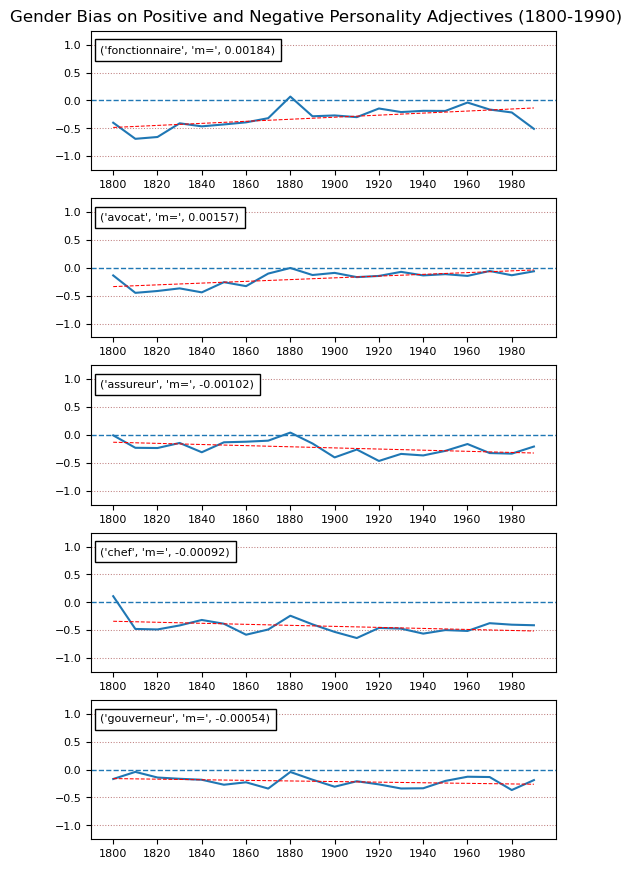

In [55]:
compiled_test_words = quick_list
# compiled_test_words = french_list_occ_female + french_list_occ_male + french_list_personality_female + french_list_personality_male + french_list_appearance_adj_female + french_list_appearance_adj_male
MINIMUM_CONSECUTIVE_YEARS = 19
compiled_test_words_min_years = filter_minimum_years(compiled_test_words, gensim_file_path_fr, MINIMUM_CONSECUTIVE_YEARS)
word_vectors_list = get_score_from_list(compiled_test_words_min_years, gensim_file_path_fr)
word_vectors_list = pd.DataFrame(word_vectors_list, columns=['word','year','score'])
SLOPE_THRESHOLD = 0.001
lines = word_vectors_list.word.unique()
report_adj_slope_fr = plot_graph(lines, SLOPE_THRESHOLD, head_count=5,
    title="Gender Bias on Positive and Negative Personality Adjectives (1800-1990)")


temp_pd = pd.DataFrame(report_adj_slope_fr).set_index(0)
temp_pd.index.name = None
temp_pd = temp_pd.join(pd.DataFrame(word_vectors_list.groupby('word', as_index=True)['score'].mean()))
temp_pd.columns = ['slope','mean_score']
print(temp_pd.iloc[temp_pd.slope.abs().argsort()[::-1]].head(10))